In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [31]:
house = pd.read_csv("house train.csv")
house.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [32]:
# Y is the target variable
Y = house['SalePrice']
# X is the feature set which includes
X = house[['OverallQual','YearBuilt']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [21]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     1013.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          1.07e-255
Time:                        13:51:45   Log-Likelihood:                -14224.
No. Observations:                1168   AIC:                         2.845e+04
Df Residuals:                    1165   BIC:                         2.847e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.853e+05   1.05e+05     -5.599      0.000    -7.9e+05    -3.8e+05
OverallQual  4.188e+04   1228.279     34.093      0.000    3.95e+04    4.43e+04
YearBuilt     258.9958     55.110      4.700      0.000     150.869     367.123
==============================================================================
Omnibus:                      450.102   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4026.588
Skew:                           1.526   Prob(JB):                         0.00
Kurtosis:                      11.568   Cond. No.                     1.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

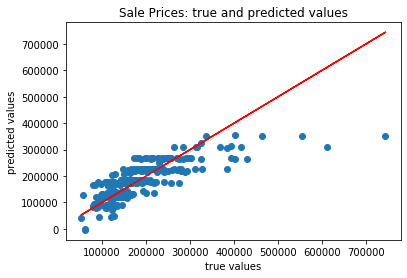

Mean absolute error of the prediction is: 34215.87831563781
Mean squared error of the prediction is: 2714677686.8261013
Root mean squared error of the prediction is: 52102.5689081268
Mean absolute percentage error of the prediction is: 19.703667047811376


In [34]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Sale Prices: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [38]:
# Y is the target variable
Y = house['SalePrice']

# This is the interaction OverallQual and YearBuilt
house["Qual_Year"] = house.OverallQual * house.YearBuilt

# X is the feature set
X = house[['OverallQual','YearBuilt','Qual_Year']]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [43]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     721.8
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          5.06e-265
Time:                        14:06:02   Log-Likelihood:                -14199.
No. Observations:                1168   AIC:                         2.841e+04
Df Residuals:                    1164   BIC:                         2.843e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.383e+06   4.27e+05      5.579      0.000    1.55e+06    3.22e+06
OverallQual -4.419e+05   6.76e+04     -6.536      0.000   -5.75e+05   -3.09e+05
YearBuilt   -1248.5170    217.435     -5.742      0.000   -1675.126    -821.908
Qual_Year     245.1716     34.256      7.157      0.000     177.961     312.382
==============================================================================
Omnibus:                      436.622   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4052.855
Skew:                           1.458   Prob(JB):                         0.00
Kurtosis:                      11.647   Cond. No.                     4.00e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

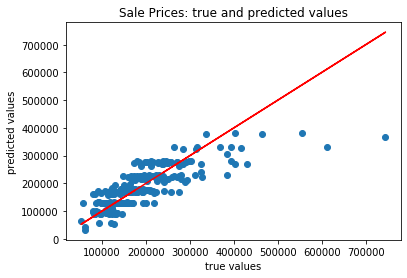

Mean absolute error of the prediction is: 33514.57023431185
Mean squared error of the prediction is: 2531082246.148996
Root mean squared error of the prediction is: 50309.86231494771
Mean absolute percentage error of the prediction is: 18.79247927220555


In [44]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Sale Prices: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [24]:
# Estimating our model from the previous checkpoint in the train set, adjusted R squared is 0,634 which is good,
# it can explain %63.4 part of variance of the target, and the associated p-value is very close to zero which is also good.
# In the graph, we see that our model predicts the lower values of the target better than the higher values.
# the performance of our model is satisfactory because the predicted values are similar to true values and MAE value is low.
# After including interaction variable MAE value decreased so the model has developed.